In [1]:
#Generating values using normal distribution

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [34]:
#setting seed
random.seed(42)

In [35]:
def create_enviroment(n_arms : int, max_mean = 10):
    """
    Input : n_arms -> no. of arms
          : max_mean -> sets the mean range from 0 to max_mean || by default set to 10
    Output : k_mean_dict -> Dictonary with key values as integer : normal distr. vals
    
    """
    #assertions
    assert n_arms > 0 , f"n_arms needs to be an integer larger than 0 NOT {n_arms}"
    assert max_mean, f"max_mean needs to be an integer NOT {max_mean}" 
    
    k_mean_dict = {}
    keys = list(range(1, n_arms+1))
    values = []
    for i in range(n_arms):#loc needs to be random a bit
        rand_val = random.randint(0, max_mean)#range b/w 0 to 10
        curr_val = np.random.normal(loc = rand_val, scale = 1, size = 10)#normal dist. #size->no. of observations
        values.append(curr_val)
        #filling dict
    k_mean_dict = dict(zip(keys, values))
    #k_mean_dict = keys
    #k_mean_dict = values
    del values, keys #cleaning memory
    return k_mean_dict

In [36]:
def select_randomly(env):
    select_arm = random.randint(1, len(env.keys()))
    return select_arm

In [37]:
#exploring function
def explore(known_vals, env, epsilon = 0):
    val = max(known_vals)
    select_arm = val
    while (select_arm == val):
        select_arm = random.randint(1, len(env.keys()))
    return select_arm

In [38]:
#greedy
def exploit(known_vals, env = 1, epsilon = 0):
    greedy_arm = max(known_vals)
    return greedy_arm

In [39]:
#epsilon greedy
def epsilon_greedy(env, known_vals, epsilon = 0.2):
    random_val = random.randint(1,100)
    if(random_val <= epsilon*100):
        arm = explore(known_vals, env)
        print('')
    else:
        arm = exploit(known_vals)
    return arm

In [40]:
#basic chosing system
def take_attempts(attempts, env, selection_fn, arm_selection_tech):
    """
    Input :     attempts                     | no of attempts
                env                          | enviroment
                selection_fn                 | fn using which arm is selected
                arm_selection_tech           | technique used to select arms
                
    Output :    tracking_list                | list containing all the rewards
                arm_chosen                   | arm chosen
                known_vals                   | arm : total reward
    """
    
    known_vals = {}
    for i in range(0, len(env.keys())):
        known_vals[i] = 0
        
    select_arms = []
    vals = []
    tracking_list = []
    
    for i in range(1, attempts):
        #pulling from a random distribution
        select_val = random.randint(0, 9)#accessing 0-9 total 10 points
        #selecting arm
        #arm = explore(known_vals)
        
        #Selecting technique
        select_arm = arm_selection_tech(known_vals, env, 0.2)#n_arms
        
        current_value = env[select_arm][select_val]
        tracking_list.append(current_value)#save in a list
        
        select_arms.append(select_arm)
        vals.append(current_value)      
        
        known_vals = dict(zip(select_arms, vals))
        #print(select_arm, known_vals)
    total_reward = sum(tracking_list)
    
    return tracking_list, select_arms, known_vals

In [41]:
def plot_rewards(reward_list, title, figsize = (1, 1)):
    scores = np.asarray(reward_list)
    plt.plot(scores)
    plt.ylabel("Rewards")
    plt.xlabel("Steps")
    plt.title(title.title())
    plt.figure(figsize = figsize)
    plt.show()

In [42]:
al = create_enviroment(12)

In [43]:
%%capture output
attempts  = 500
tracking_list, arm_chosen, known_vals = take_attempts(attempts, al, select_randomly, epsilon_greedy);

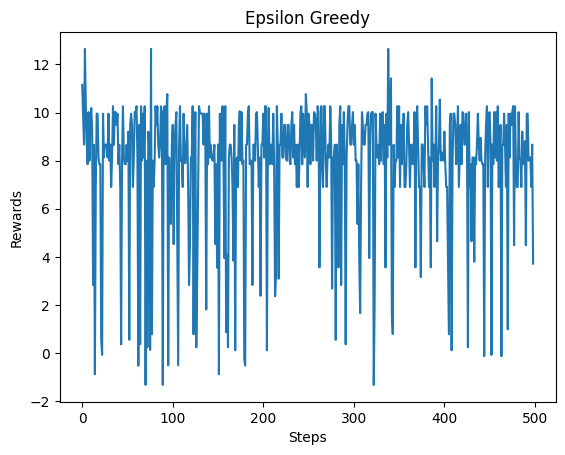

<Figure size 100x100 with 0 Axes>

Average Reward :  7.808803465032109


In [44]:
plot_rewards(tracking_list, 'Epsilon greedy')
print("Average Reward : ", sum(tracking_list)/attempts)
reward_epsilon = sum(tracking_list)/attempts

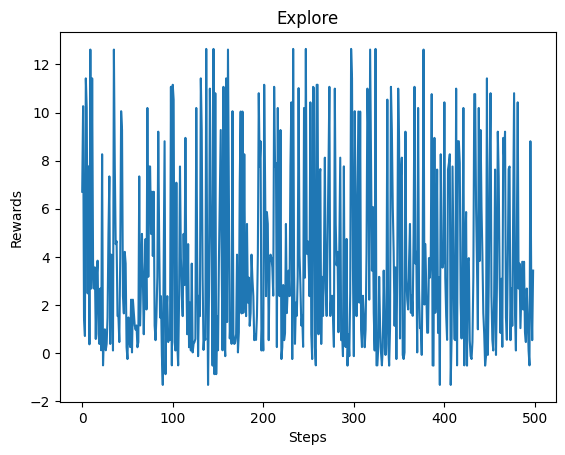

<Figure size 100x100 with 0 Axes>

Average Reward :  3.8393176648406886


In [45]:
tracking_list_explo, arm_chosen, known_vals = take_attempts(attempts, al, select_randomly, explore)
plot_rewards(tracking_list_explo, 'explore')
print("Average Reward : ", sum(tracking_list_explo)/attempts)
reward_explore = sum(tracking_list_explo)/attempts

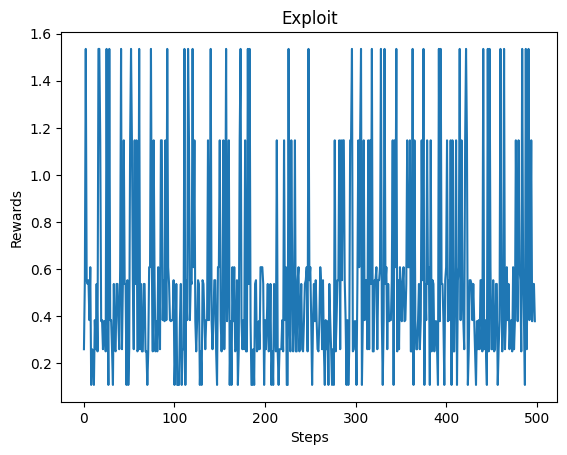

<Figure size 100x100 with 0 Axes>

Average Reward :  0.5461893423436966


In [46]:
tracking_list_exp, arm_chosen, known_vals = take_attempts(attempts, al, select_randomly, exploit)
plot_rewards(tracking_list_exp, 'exploit')
print("Average Reward : ", sum(tracking_list_exp)/attempts)
reward_exploit = sum(tracking_list_exp)/attempts

In [32]:
print('reward_epsilon, reward_explore, reward_exploit\n', reward_epsilon, reward_explore, reward_exploit)

reward_epsilon, reward_explore, reward_exploit
 4.39393883056564 5.9055972882192345 5.0541568638299506


In [23]:
### The epsilon reward should be highest as it learns from its trials and perform better